<a href="https://colab.research.google.com/github/game16021/repository_01/blob/main/mnist.ipynb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Colaboratory란?</h1>

줄여서 'Colab'이라고도 하는 Colaboratory를 사용하면 브라우저에서 Python을 작성하고 실행할 수 있습니다. Colab은 다음과 같은 이점을 자랑합니다.
- 구성이 필요하지 않음
- GPU 무료 액세스
- 간편한 공유

<strong>학생</strong>이든, <strong>데이터 과학자</strong>든, <strong>AI 연구원</strong>이든 Colab으로 업무를 더욱 간편하게 처리할 수 있습니다. <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 소개 영상</a>에서 자세한 내용을 확인하거나 아래에서 시작해 보세요.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [13]:
(trainX, trainY), (testX, testY) = keras.datasets.mnist.load_data()
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [14]:
trainX.shape

(60000, 28, 28)

In [15]:
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

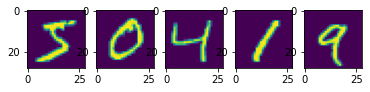

In [17]:
plt.subplot(1,5,1)
plt.imshow(trainX[0])
plt.subplot(1,5,2)
plt.imshow(trainX[1])
plt.subplot(1,5,3)
plt.imshow(trainX[2])
plt.subplot(1,5,4)
plt.imshow(trainX[3])
plt.subplot(1,5,5)
plt.imshow(trainX[4])
plt.show()

In [18]:
trainX = trainX.reshape((60000, 28*28))
testX = testX.reshape((10000, 28*28))

trainX = trainX / 255
testX = testX / 255

In [19]:
model = keras.Sequential()
model.add (layers.InputLayer(input_shape=(28*28,)))
model.add (layers.Dense(128, activation='relu'))
model.add (layers.Dense(10, activation='softmax'))

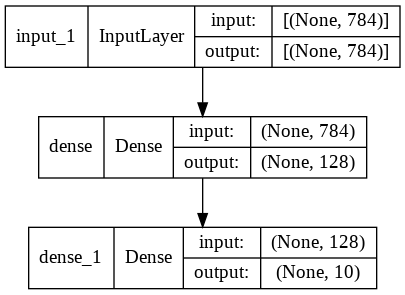

In [20]:
plot_model(model, show_shapes=True)

In [44]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [45]:
hist1 = model.fit (trainX, trainY, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9267
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1136 - accuracy: 0.9675
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0778 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0454 - accuracy: 0.9861


In [46]:
model.evaluate(testX,testY)

313/313 [==============================] - 1s 1ms/step - loss: 0.0757 - accuracy: 0.9758


[0.0757414698600769, 0.9757999777793884]

In [47]:
print(hist1.history['loss'])
print(hist1.history['accuracy'])

[0.25779128074645996, 0.11357706785202026, 0.0777924656867981, 0.059122636914253235, 0.0454077422618866]
[0.9266666769981384, 0.9674833416938782, 0.9764166474342346, 0.9819499850273132, 0.9860833287239075]


In [64]:
preds = model.predict(testX)
print(preds[0])
print(np.argmax(preds[0]))

[1.9836256e-07 1.9472597e-09 8.4503072e-06 3.9646893e-05 6.5504438e-13
 7.7344218e-08 4.7222570e-10 9.9995041e-01 6.1793264e-07 4.8965546e-07]
7


7


<function matplotlib.pyplot.show>

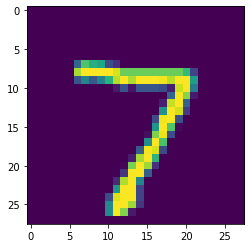

In [63]:
print(testY[0])
plt.imshow(testX[0].reshape(28,28))
plt.show

(0.0, 3.0)

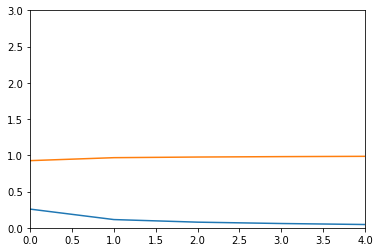

In [65]:
plt.figure()
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['accuracy'])
plt.xlim([0,4])
plt.ylim([0,3])